Two-Dimensional Harmonic Oscillator with perturbation $\delta H=\delta m \omega^2 x y$

## Preamble

In [26]:
import sympy as sp
from sympy.physics.quantum import Dagger,qapply
from sympy.physics.quantum.sho1d import RaisingOp, LoweringOp, SHOKet, SHOBra
import numpy as np
import matplotlib.pyplot as plt

Matrix element of $x$ for a 1-D SHO

In [4]:
m,omega,hbar = sp.symbols('m,omega,hbar',positive=True)
delta=sp.Symbol('delta',real=True)

Reduced position: $x_r=(a+a^\dagger)$

Position: $x=\sqrt{\frac{\hbar}{2 m \omega}}x_r$

In [6]:
alpha=SHOBra('alpha')
beta=SHOKet('beta')
Ad=RaisingOp('a')
A=LoweringOp('a')

In [7]:
xr=(A+Ad)
xr

a + RaisingOp(a)

In [8]:
from io import StringIO
import sys

In [9]:
buffer=StringIO()
sys.stdout=buffer

In [10]:
print(qapply(alpha*xr*beta).simplify())
matrix_element_1=buffer.getvalue()

In [22]:
n1x,n2x,n1y,n2y=sp.symbols(r'n_1^x,n_2^x,n_1^y,n_2^y',positive=True)

In [23]:
def matrix_element_x(a,b):
  u,v=sp.symbols('u,v')
  res0=sp.parse_expr((matrix_element_1.replace("alpha","u")).replace("beta","v"))
  res1=res0.subs([(u,a),(v,b)])
  return sp.sqrt(hbar/(2*m*omega))*res1

In [24]:
matrix_element_x(n1x,n2x)

sqrt(2)*sqrt(hbar)*(sqrt(n_2^x)*KroneckerDelta(n_1^x, n_2^x - 1) + sqrt(n_2^x + 1)*KroneckerDelta(n_1^x, n_2^x + 1))/(2*sqrt(m)*sqrt(omega))

## Degeneracy

Energies of the Unperturbed Hamiltonian

In [25]:
def E(nx,ny):
  return hbar*omega*(nx+ny+1)

Relative Energy w.r.t $\hbar\omega$

In [32]:
e=sp.lambdify([n1x,n1y], E(n1x,n1y)/(hbar*omega))

In [64]:
relative_energies=np.array([])
for i in range(4):
  for j in range (4):
    relative_energies=np.append(relative_energies,e(i,j))

Text(0, 0.5, '$E/(\\hbar\\omega)$')

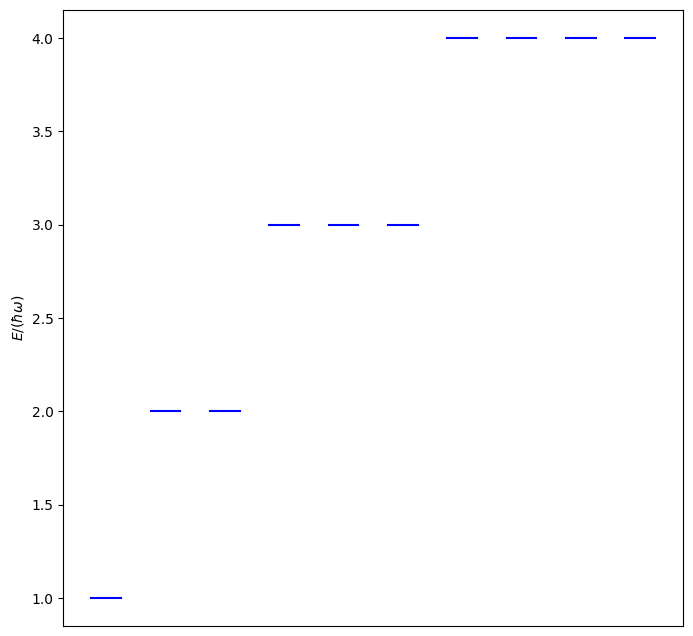

In [144]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
levels=[[(k,k+0.5),(e,e)] for k, e in enumerate(sorted(relative_energies))]
for level in levels[:10]:
  ax.plot(level[0],level[1],'b')
ax.set_xticks([])
ax.set_ylabel(r'$E/(\hbar\omega)$')

## Matrix Elements of the Perturbation:
$⟨n^x_1,n^y_1|\delta H|n^x_2,n^y_2\rangle=\delta m \omega^2\langle n^x_1|x|n^x_2\rangle\langle n^y_1|y|n^y_2\rangle$

In [70]:
def d1H(a1x,a1y,a2x,a2y):
  return delta*m*omega**2*matrix_element_x(a1x,a2x)*matrix_element_x(a1y,a2y)

In [72]:
d1H(n1x,n1y,n2x,n2y)

delta*hbar*omega*(sqrt(n_2^x)*KroneckerDelta(n_1^x, n_2^x - 1) + sqrt(n_2^x + 1)*KroneckerDelta(n_1^x, n_2^x + 1))*(sqrt(n_2^y)*KroneckerDelta(n_1^y, n_2^y - 1) + sqrt(n_2^y + 1)*KroneckerDelta(n_1^y, n_2^y + 1))/2

In [145]:
def d2H(a1x,a1y,a2x,a2y):
  return 0

## Ground State Energy Shifts at First and Second Order in Perturbation Theory

First Order

In [73]:
def d1E(ax,ay):
  return d1H(ax,ay,ax,ay)

In [74]:
d1E(n1x,n1y)

0

Second Order

In [78]:
def Delta_E(nx,ny,lx,ly):
  return sp.simplify(E(nx,ny)-E(lx,ly))

In [92]:
def d2E(ax,ay):
  res=d2H(ax,ay,ax,ay)
  for lx in [ax-2,ax-1,ax+1,ax+2]:
    for ly in [ax-2,ax-1,ax+1,ax+2]:
      if lx>=0 and ly>=0:
        res=res+((d1H(ax,ay,lx,ly)*d1H(lx,ly,ax,ay))/Delta_E(ax,ay,lx,ly)).expand()
  return res.simplify()


In [94]:
d2E(0,0)

-delta**2*hbar*omega/8

## First Degenerate Level: Energy Shifts and Zeroth Order States

The first and second excited levels are degenerate. We must first diagonalize the matrix elements in the degenerate subspace to find the corresponding energy shifts.

In [96]:
M1=sp.Matrix([[d1H(1,0,1,0),d1H(1,0,0,1)],
           [d1H(0,1,1,0),d1H(0,1,0,1)]])
M1

Matrix([
[                 0, delta*hbar*omega/2],
[delta*hbar*omega/2,                  0]])

In [97]:
O0,M1D=M1.diagonalize()

First Order Energy Shifts

In [99]:
M1D

Matrix([
[-delta*hbar*omega/2,                  0],
[                  0, delta*hbar*omega/2]])

Eigenvector Normalization

In [101]:
O1=(O0*sp.sqrt(sp.transpose(O0)*O0)**(-1)).simplify()
O1

Matrix([
[-sqrt(2)/2, sqrt(2)/2],
[ sqrt(2)/2, sqrt(2)/2]])

In [114]:
sp.transpose(O1)*M1*O1

Matrix([
[-delta*hbar*omega/2,                  0],
[                  0, delta*hbar*omega/2]])

Zeroth order Eigenstates for Which the Perturbation is Diagonal

$|1^{(0)}\rangle=\frac{1}{\sqrt{2}}\left(-|1,0\rangle+|0,1\rangle\right)$

In [112]:
O1[:,0]

Matrix([
[-sqrt(2)/2],
[ sqrt(2)/2]])

In [107]:
(M1*O1[:,0]-M1D[0,0]*O1[:,0]).simplify()

Matrix([
[0],
[0]])

$|1^{(1)}\rangle=\frac{1}{\sqrt{2}}\left(|1,0\rangle+|0,1\rangle\right)$

In [113]:
O1[:,1]

Matrix([
[sqrt(2)/2],
[sqrt(2)/2]])

In [111]:
(M1*O1[:,1]-M1D[1,1]*O1[:,1]).simplify()

Matrix([
[0],
[0]])

## Second Degenerate Subspace: Energy Shifts and Zeroth Order States

The second excited level is threefold degenerate. The corresponding matrix to diagonalize is the following:

In [115]:
M2=sp.Matrix([[d1H(2,0,2,0),d1H(2,0,1,1),d1H(2,0,0,2)],
              [d1H(1,1,2,0),d1H(1,1,1,1),d1H(1,1,0,2)],
              [d1H(0,2,2,0),d1H(0,2,1,1),d1H(0,2,0,2)]])
M2

Matrix([
[                         0, sqrt(2)*delta*hbar*omega/2,                          0],
[sqrt(2)*delta*hbar*omega/2,                          0, sqrt(2)*delta*hbar*omega/2],
[                         0, sqrt(2)*delta*hbar*omega/2,                          0]])

In [116]:
P0,M2D=M2.diagonalize()

First Order Energy Shifts

In [117]:
M2D

Matrix([
[0,                 0,                0],
[0, -delta*hbar*omega,                0],
[0,                 0, delta*hbar*omega]])

Eigenvector Normalization

In [118]:
P1=(P0*sp.sqrt(sp.transpose(P0)*P0)**(-1)).simplify()
P1

Matrix([
[-sqrt(2)/2,        1/2,       1/2],
[         0, -sqrt(2)/2, sqrt(2)/2],
[ sqrt(2)/2,        1/2,       1/2]])

In [119]:
sp.transpose(P1)*M2*P1

Matrix([
[0,                 0,                0],
[0, -delta*hbar*omega,                0],
[0,                 0, delta*hbar*omega]])

Zeroth order Eigenstates for Which the Perturbation is Diagonal

$|2^{(0)}\rangle=\frac{1}{\sqrt{2}}\left(-|2,0\rangle+|0,2\rangle\right)$

In [120]:
P1[:,0]

Matrix([
[-sqrt(2)/2],
[         0],
[ sqrt(2)/2]])

In [121]:
(M2*P1[:,0]-M2D[0,0]*P1[:,0]).simplify()

Matrix([
[0],
[0],
[0]])

$|2^{(1)}\rangle=\frac{1}{2}\left(|2,0\rangle-\sqrt{2}|1,1\rangle+|0,2\rangle\right)$

In [122]:
P1[:,1]

Matrix([
[       1/2],
[-sqrt(2)/2],
[       1/2]])

In [123]:
(M2*P1[:,1]-M2D[1,1]*P1[:,1]).simplify()

Matrix([
[0],
[0],
[0]])

$|2^{(2)}\rangle=\frac{1}{2}\left(|2,0\rangle+\sqrt{2}|1,1\rangle+|0,2\rangle\right)$

In [125]:
P1[:,2]

Matrix([
[      1/2],
[sqrt(2)/2],
[      1/2]])

In [127]:
(M2*P1[:,2]-M2D[2,2]*P1[:,2]).simplify()

Matrix([
[0],
[0],
[0]])